<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/S7_Nagaraj_Work_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Changes to be made
1. change the code such that it uses GPU -- Done
2. change the architecture to C1C2C3C40 (basically 3 MPs) -- Done
3. total RF must be more than 44 -- Done
4. one of the layers must use Depthwise Separable Convolution -- Done
5. one of the layers must use Dilated Convolution -- Done
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional) -- Done
7. achieve 80% accuracy, as many epochs as you want. Total Params to be less than 1M. -- Done
8. upload to Github -- Done
9. Attempt S7-Assignment Solution -- Done

In [20]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/libs')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cifar10_data_provider, my_model, my_trainer, my_tester

In [22]:
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


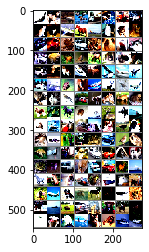

In [23]:
cifar10_data_provider.display(train_loader, classes)

In [24]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = my_model.Net().to(device)

cuda


In [25]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 16, 16, 16]             512
      BatchNorm2d-11           [-1, 16, 16, 16]              32
             ReLU-12           [-1, 16, 16, 16]               0
          Dropout-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 32,

In [41]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model =  my_model.Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 50

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.403416633605957 Batch_id=390 Accuracy=37.44: 100%|██████████| 391/391 [00:12<00:00, 31.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6403, Accuracy: 3859/10000 (38.59%)

EPOCH: 1


Loss=1.0382158756256104 Batch_id=390 Accuracy=54.95: 100%|██████████| 391/391 [00:12<00:00, 31.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2198, Accuracy: 5687/10000 (56.87%)

EPOCH: 2


Loss=1.0617233514785767 Batch_id=390 Accuracy=61.28: 100%|██████████| 391/391 [00:12<00:00, 31.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2385, Accuracy: 5612/10000 (56.12%)

EPOCH: 3


Loss=0.9540569186210632 Batch_id=390 Accuracy=64.58: 100%|██████████| 391/391 [00:12<00:00, 31.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0761, Accuracy: 6124/10000 (61.24%)

EPOCH: 4


Loss=0.8193076252937317 Batch_id=390 Accuracy=66.92: 100%|██████████| 391/391 [00:12<00:00, 31.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9801, Accuracy: 6558/10000 (65.58%)

EPOCH: 5


Loss=0.9158138036727905 Batch_id=390 Accuracy=68.93: 100%|██████████| 391/391 [00:12<00:00, 31.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0617, Accuracy: 6294/10000 (62.94%)

EPOCH: 6


Loss=0.8828811645507812 Batch_id=390 Accuracy=70.31: 100%|██████████| 391/391 [00:12<00:00, 31.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9213, Accuracy: 6749/10000 (67.49%)

EPOCH: 7


Loss=0.5129967927932739 Batch_id=390 Accuracy=71.49: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9866, Accuracy: 6608/10000 (66.08%)

EPOCH: 8


Loss=0.8878613710403442 Batch_id=390 Accuracy=72.60: 100%|██████████| 391/391 [00:12<00:00, 36.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9714, Accuracy: 6700/10000 (67.00%)

EPOCH: 9


Loss=0.6604028940200806 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:12<00:00, 31.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8764, Accuracy: 6992/10000 (69.92%)

EPOCH: 10


Loss=0.7459897994995117 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [00:12<00:00, 31.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8292, Accuracy: 7151/10000 (71.51%)

EPOCH: 11


Loss=0.7687859535217285 Batch_id=390 Accuracy=75.11: 100%|██████████| 391/391 [00:12<00:00, 31.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8542, Accuracy: 7058/10000 (70.58%)

EPOCH: 12


Loss=0.7474544644355774 Batch_id=390 Accuracy=75.65: 100%|██████████| 391/391 [00:12<00:00, 30.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7151, Accuracy: 7532/10000 (75.32%)

EPOCH: 13


Loss=0.8070427775382996 Batch_id=390 Accuracy=75.99: 100%|██████████| 391/391 [00:12<00:00, 30.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7889, Accuracy: 7309/10000 (73.09%)

EPOCH: 14


Loss=0.6917110085487366 Batch_id=390 Accuracy=76.72: 100%|██████████| 391/391 [00:12<00:00, 30.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7076, Accuracy: 7590/10000 (75.90%)

EPOCH: 15


Loss=0.6112805604934692 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:12<00:00, 30.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7323, Accuracy: 7481/10000 (74.81%)

EPOCH: 16


Loss=0.8570143580436707 Batch_id=390 Accuracy=77.60: 100%|██████████| 391/391 [00:12<00:00, 30.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7114, Accuracy: 7577/10000 (75.77%)

EPOCH: 17


Loss=0.5159919857978821 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:12<00:00, 30.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7249, Accuracy: 7560/10000 (75.60%)

EPOCH: 18


Loss=0.44855350255966187 Batch_id=390 Accuracy=78.24: 100%|██████████| 391/391 [00:12<00:00, 31.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7038, Accuracy: 7555/10000 (75.55%)

EPOCH: 19


Loss=0.582314670085907 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:12<00:00, 35.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6556, Accuracy: 7775/10000 (77.75%)

EPOCH: 20


Loss=0.5932595729827881 Batch_id=390 Accuracy=78.87: 100%|██████████| 391/391 [00:12<00:00, 30.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6466, Accuracy: 7773/10000 (77.73%)

EPOCH: 21


Loss=0.6541954278945923 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [00:12<00:00, 31.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6361, Accuracy: 7848/10000 (78.48%)

EPOCH: 22


Loss=0.6063033938407898 Batch_id=390 Accuracy=79.03: 100%|██████████| 391/391 [00:12<00:00, 38.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6234, Accuracy: 7899/10000 (78.99%)

EPOCH: 23


Loss=0.8087409138679504 Batch_id=390 Accuracy=79.57: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6568, Accuracy: 7790/10000 (77.90%)

EPOCH: 24


Loss=0.5764308571815491 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:12<00:00, 31.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6873, Accuracy: 7620/10000 (76.20%)

EPOCH: 25


Loss=0.7505563497543335 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:12<00:00, 30.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5964, Accuracy: 7978/10000 (79.78%)

EPOCH: 26


Loss=0.682489275932312 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:12<00:00, 31.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5825, Accuracy: 8061/10000 (80.61%)

EPOCH: 27


Loss=0.6885736584663391 Batch_id=390 Accuracy=80.14: 100%|██████████| 391/391 [00:12<00:00, 30.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6539, Accuracy: 7791/10000 (77.91%)

EPOCH: 28


Loss=0.5717445611953735 Batch_id=390 Accuracy=80.46: 100%|██████████| 391/391 [00:12<00:00, 30.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5823, Accuracy: 8060/10000 (80.60%)

EPOCH: 29


Loss=0.5098368525505066 Batch_id=390 Accuracy=80.57: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5411, Accuracy: 8153/10000 (81.53%)

EPOCH: 30


Loss=0.7404089570045471 Batch_id=390 Accuracy=80.70: 100%|██████████| 391/391 [00:12<00:00, 30.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6298, Accuracy: 7812/10000 (78.12%)

EPOCH: 31


Loss=0.5539652705192566 Batch_id=390 Accuracy=81.06: 100%|██████████| 391/391 [00:12<00:00, 30.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5619, Accuracy: 8063/10000 (80.63%)

EPOCH: 32


Loss=0.6462348699569702 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [00:12<00:00, 31.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5449, Accuracy: 8148/10000 (81.48%)

EPOCH: 33


Loss=0.5472862124443054 Batch_id=390 Accuracy=81.35: 100%|██████████| 391/391 [00:12<00:00, 30.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5868, Accuracy: 7969/10000 (79.69%)

EPOCH: 34


Loss=0.5544441938400269 Batch_id=390 Accuracy=81.02: 100%|██████████| 391/391 [00:12<00:00, 31.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5484, Accuracy: 8147/10000 (81.47%)

EPOCH: 35


Loss=0.4890635013580322 Batch_id=390 Accuracy=81.43: 100%|██████████| 391/391 [00:12<00:00, 30.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6041, Accuracy: 7968/10000 (79.68%)

EPOCH: 36


Loss=0.4023226201534271 Batch_id=390 Accuracy=81.36: 100%|██████████| 391/391 [00:12<00:00, 37.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5643, Accuracy: 8034/10000 (80.34%)

EPOCH: 37


Loss=0.5274583101272583 Batch_id=390 Accuracy=81.42: 100%|██████████| 391/391 [00:12<00:00, 36.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5522, Accuracy: 8158/10000 (81.58%)

EPOCH: 38


Loss=0.5933144092559814 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [00:12<00:00, 30.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5556, Accuracy: 8116/10000 (81.16%)

EPOCH: 39


Loss=0.651288628578186 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:12<00:00, 38.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5755, Accuracy: 8037/10000 (80.37%)

EPOCH: 40


Loss=0.593545138835907 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:12<00:00, 30.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6109, Accuracy: 7931/10000 (79.31%)

EPOCH: 41


Loss=0.49452871084213257 Batch_id=390 Accuracy=81.77: 100%|██████████| 391/391 [00:12<00:00, 30.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5573, Accuracy: 8137/10000 (81.37%)

EPOCH: 42


Loss=0.45250385999679565 Batch_id=390 Accuracy=82.19: 100%|██████████| 391/391 [00:12<00:00, 30.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5325, Accuracy: 8220/10000 (82.20%)

EPOCH: 43


Loss=0.41438722610473633 Batch_id=390 Accuracy=82.27: 100%|██████████| 391/391 [00:12<00:00, 30.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5966, Accuracy: 7976/10000 (79.76%)

EPOCH: 44


Loss=0.4878947138786316 Batch_id=390 Accuracy=82.36: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5627, Accuracy: 8099/10000 (80.99%)

EPOCH: 45


Loss=0.538615345954895 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:12<00:00, 30.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5604, Accuracy: 8053/10000 (80.53%)

EPOCH: 46


Loss=0.3874521851539612 Batch_id=390 Accuracy=82.10: 100%|██████████| 391/391 [00:12<00:00, 30.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5433, Accuracy: 8175/10000 (81.75%)

EPOCH: 47


Loss=0.5288342237472534 Batch_id=390 Accuracy=82.42: 100%|██████████| 391/391 [00:12<00:00, 37.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5385, Accuracy: 8172/10000 (81.72%)

EPOCH: 48


Loss=0.544784426689148 Batch_id=390 Accuracy=82.77: 100%|██████████| 391/391 [00:12<00:00, 30.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5430, Accuracy: 8131/10000 (81.31%)

EPOCH: 49


Loss=0.4505937695503235 Batch_id=390 Accuracy=82.86: 100%|██████████| 391/391 [00:12<00:00, 38.69it/s]



Test set: Average loss: 0.5657, Accuracy: 8072/10000 (80.72%)



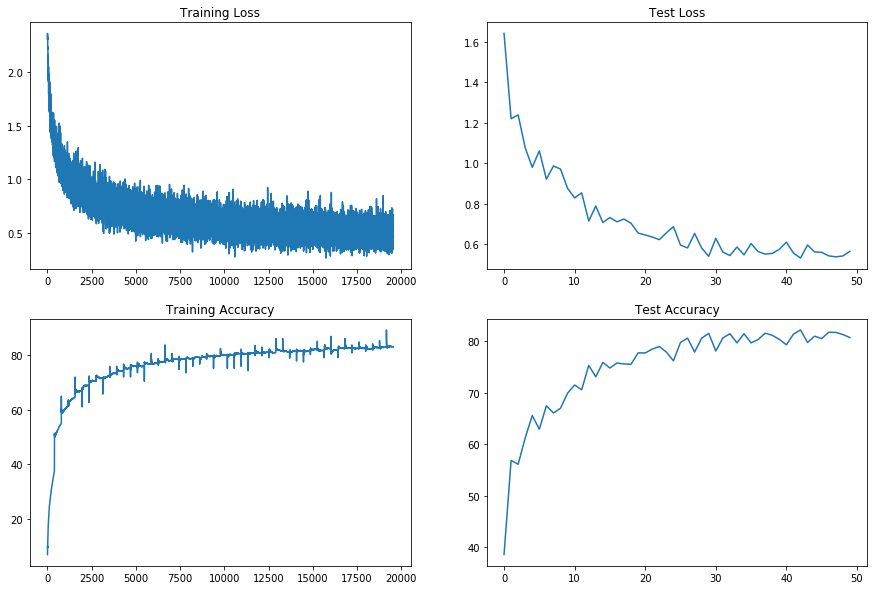

In [42]:
%matplotlib inline
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)